# TP 2. PARTIE 2. PDA - QDA. k-NN

- On importe toutes les librairies dont on aura besoin : 

In [6]:
import numpy as np

import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
%matplotlib inline

import pandas as pd
import seaborn as sns

In [17]:
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.metrics import accuracy_score

# . Dataset Vowel


#### dataset source : https://web.stanford.edu/~hastie/ElemStatLearn/data.html

### Importation des datas train et test :

On sépare les datas en train et test : 

- #### Données d'entraînement : 

In [18]:
train=pd.read_csv('vowel.train.csv', sep=',', index_col=0)
train.head()


,y,x.1,x.2,x.3,x.4,x.5,x.6,x.7,x.8,x.9,x.10
row.names,,,,,,,,,,,
1,1,-3.639,0.418,-0.670,1.779,-0.168,1.627,-0.388,0.529,-0.874,-0.814
2,2,-3.327,0.496,-0.694,1.365,-0.265,1.933,-0.363,0.510,-0.621,-0.488
3,3,-2.120,0.894,-1.576,0.147,-0.707,1.559,-0.579,0.676,-0.809,-0.049
4,4,-2.287,1.809,-1.498,1.012,-1.053,1.060,-0.567,0.235,-0.091,-0.795
5,5,-2.598,1.938,-0.846,1.062,-1.633,0.764,0.394,-0.150,0.277,-0.396


- #### Données de test : 

In [19]:
test=pd.read_csv('vowel.test.csv', sep=',',index_col=0)
test

,y,x.1,x.2,x.3,x.4,x.5,x.6,x.7,x.8,x.9,x.10
row.names,,,,,,,,,,,
1,1,-1.149,-0.904,-1.988,0.739,-0.060,1.206,0.864,1.196,-0.300,-0.467
2,2,-2.613,-0.092,-0.540,0.484,0.389,1.741,0.198,0.257,-0.375,-0.604
3,3,-2.505,0.632,-0.593,0.304,0.496,0.824,-0.162,0.181,-0.363,-0.764
4,4,-1.768,1.769,-1.142,-0.739,-0.086,0.120,-0.230,0.217,-0.009,-0.279
5,5,-2.671,3.155,-0.514,0.133,-0.964,0.234,-0.071,1.192,0.254,-0.471
6,6,-2.509,1.326,0.354,0.663,-0.724,0.418,-0.496,0.713,0.638,-0.204
7,7,-2.764,1.111,0.727,1.540,-0.855,0.261,-1.110,0.227,0.420,0.991
8,8,-3.816,3.426,0.224,-0.384,-1.733,0.434,-0.322,1.333,0.653,0.577
9,9,-3.839,1.248,0.830,0.982,-1.110,0.617,-0.751,0.084,0.309,1.125


####  Taille des données : (train et test) 

In [20]:
print(train.shape)
print(test.shape)

(528, 11)
(462, 11)


In [21]:
np.unique(train["y"])

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11], dtype=int64)

#### C'est un problème de classification multi-classes avec 11 classes. On vérifie si le nombre d'observations par classes (class balancing) est bien équilibré.

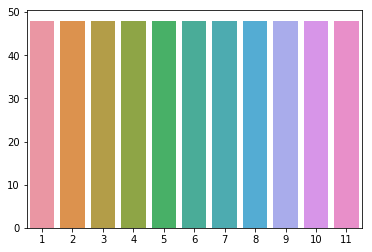

In [22]:
sns.barplot(np.unique(train["y"]),train.groupby("y").count().values[:,0])

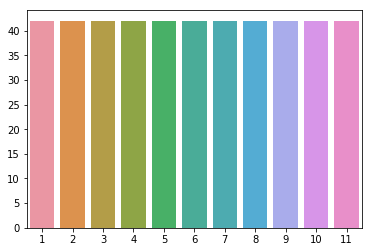

In [23]:
sns.barplot(np.unique(test["y"]),test.groupby("y").count().values[:,0])

#### Ici, on enlève la première colonne nommée (row names) pour qu'elle n'affecte pas notre analyse sur les données.

In [24]:
y_train = train.values[:,0]
X_train = train.values[:,1:]

print(X_train.shape) #On revérifie la taille


(528, 10)


In [25]:
y_test = test.values[:,0]
X_test = test.values[:,1:]

print(X_test.shape) #On revérifie la taille

(462, 10)


# Machine learning

## 1 . Naive Bayes 

In [26]:
NB = GaussianNB()
NB_fit = NB.fit(X=X_train, y=y_train)
print("Number of mislabeled points out of a total %d points : %d"
       % (X_train.shape[0],(y_train != NB_fit).sum()))

Number of mislabeled points out of a total 528 points : 528


In [27]:
print("Le score sur le train est :", accuracy_score(NB_fit.predict(X_train),y_train))
print("Le score sur le test est :", accuracy_score(NB_fit.predict(X_test),y_test))

Le score sur le train est : 0.7196969696969697
Le score sur le test est : 0.461038961038961


## 2 . LDA & QDA : 

In [28]:
LDA = LinearDiscriminantAnalysis()
LDA_fit = LDA.fit(X=X_train, y=y_train)

In [29]:
print("Le score sur le train est :", accuracy_score(LDA_fit.predict(X_train),y_train))
print("Le score sur le test est :", accuracy_score(LDA_fit.predict(X_test),y_test))

Le score sur le train est : 0.6837121212121212
Le score sur le test est : 0.44372294372294374


In [30]:
QDA = QuadraticDiscriminantAnalysis()
QDA_fit = QDA.fit(X=X_train, y=y_train)


In [31]:
print("Le score sur le train est :", accuracy_score(QDA_fit.predict(X_train),y_train))
print("Le score sur le test est :", accuracy_score(QDA_fit.predict(X_test),y_test))

Le score sur le train est : 0.9886363636363636
Le score sur le test est : 0.47186147186147187


### Conclusion : 

#### Après avoir tester les trois classifieurs sur les données (train et test), on remarque qu'ils donnent presque le même score sur les données test qui ne dépasse pas les 50% (46% pour NB, 44% pour LDA et 47% pour QDA), ce qui nous laisse penser à essayer un autre modèle (k-NN) car la performance des trois précédents n'est pas top.

# 3. k-NN

<img src="https://media1.giphy.com/media/LNXivXzMwd7W0/giphy.gif" width = 300>
<a id="3"></a> 

On va utiliser l'algo k-NN pour différents k et on va comparer ses performances avec les méthodes précédentes.

L’algor k-NN consiste à chercher les k données les plus proches notre observation.

In [32]:
from sklearn.neighbors import KNeighborsClassifier

In [33]:
acc_train = []
acc_test = []
for k in np.arange(1,50):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn_fit = knn.fit(X=X_train, y=y_train)
    acc_train.append(accuracy_score(knn_fit.predict(X_train),y_train))
    acc_test.append(accuracy_score(knn_fit.predict(X_test),y_test))

In [38]:
k_hat = np.argmax(acc_test)
print(k_hat)

5


#### Ici, le k le plus performant est 6, vu que python commence de 0.

In [37]:
print("Les scores : train : ", ("%.3f"% acc_train[k_hat]), "/ test :", ("%.3f" % acc_test[k_hat]))

Les scores : train :  0.977 / test : 0.608


#### On trouve un meilleur score sur les données test qui est de 60% pour le 6-NN. Et on peut vérifier cela en traçant sur un seul graphique, les courbes de score du train et du test pour k allant de 0 à 50.

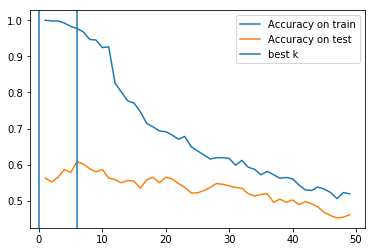

In [35]:
plt.plot(np.arange(1,50),acc_train,label="Accuracy on train")
plt.plot(np.arange(1,50),acc_test,label="Accuracy on test")
plt.axvline(np.arange(1,50)[k_hat],label="best k")
plt.axvline()
plt.legend()